In [20]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [21]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    stock_data_specific = stock_data[stock_data.index <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    fig.add_trace(go.Scatter(x=stock_data_specific.index, y=stock_data_specific['Close'], name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific['Date']), y=revenue_data_specific['Revenue'].astype(float), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()


In [22]:
ticker = yf.Ticker('TSLA')
tesla_data = ticker.history(period="max")

In [23]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [24]:
html_data = requests.get(url)

In [25]:
soup = BeautifulSoup(html_data.text, 'html.parser')

In [26]:
data = []

In [27]:
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    data.append({"Date": date, "Revenue": revenue})

In [28]:
tesla_revenue = pd.DataFrame(data)
tesla_revenue.dropna(inplace=True) 
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

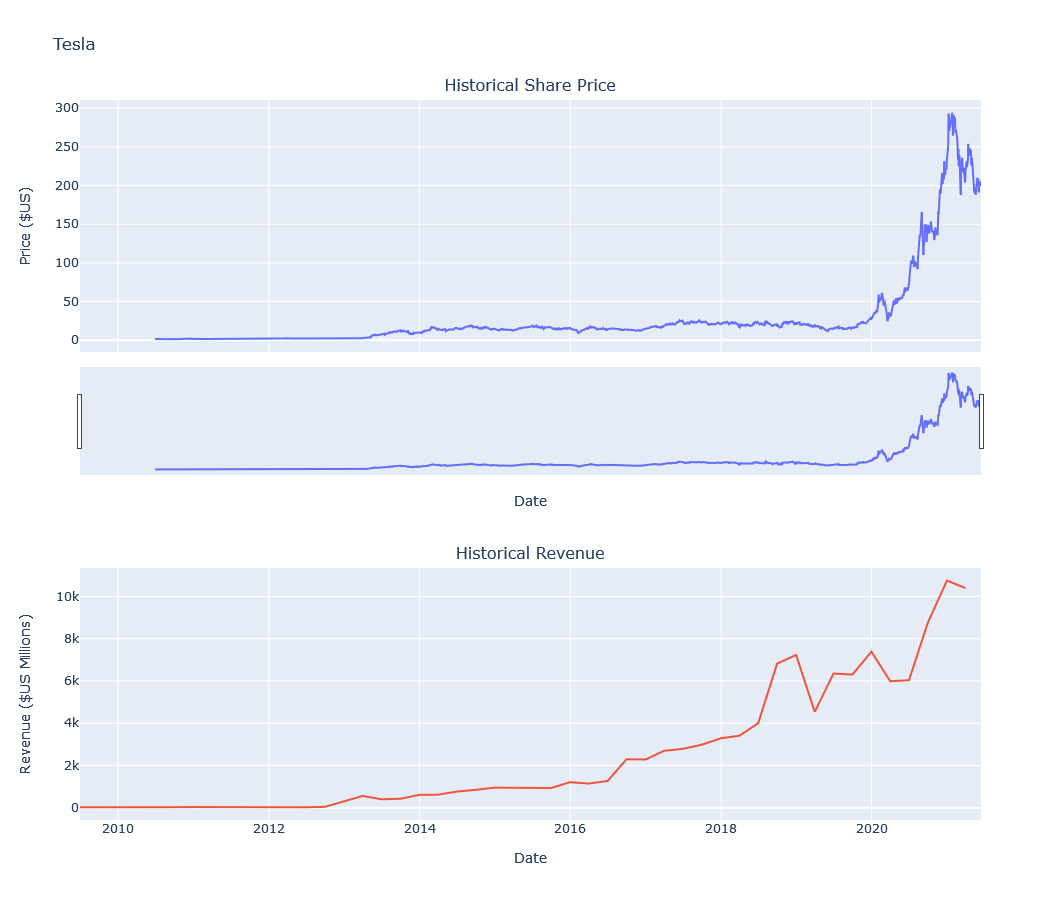

In [34]:
make_graph(tesla_data, tesla_revenue, 'Tesla')